In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

import utils as ut

In [2]:
with open('../config/algos_repo.json', 'r') as f:
    config = json.load(f)

In [3]:
df_seeds = None
df_sems = None
df_all = None

obj = config['resources']['structure_learning_algorithms']
for alg in obj:
    try:
        df = pd.read_csv(f'../backups/run5/{alg}.csv')
    except:
        continue

    print(alg)
    params = list(obj[alg][0].keys())

    df_seed = ut.best_seeds(df, params)
    df_seed['id'] = df['id'].unique()[0]
    df_seeds = pd.concat([df_seeds, df_seed], ignore_index=True)

    df_sem = ut.best_sems(df, params)
    df_sem['id'] = df['id'].unique()[0]
    df_sems = pd.concat([df_sems, df_sem], ignore_index=True)

    df_def = ut.best_all(df, params)
    df_def['id'] = df['id'].unique()[0]
    df_all = pd.concat([df_all, df_def], ignore_index=True)

pcalg_pc
tetrad_fges
tetrad_fci
gcastle_ica_lingam
gcastle_anm
cdt_cam
gcastle_notears


In [4]:
df = pd.read_csv('results.csv', index_col=0)
df_agg = df.groupby(['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n'], as_index=False)['SHD_pattern'].agg(['mean', 'sem']).reset_index()

## Plots

In [5]:
df_agg_plt = df_agg.rename(columns={'mean': 'SHD'}).drop(columns=['sem'])
df_agg_plt['strategy'] = 'seed'

df_seeds_plt = df_seeds.rename(columns={'SHD_mean': 'SHD'}).drop(columns=['hyper_id', 'SHD_sem'])
df_seeds_plt['strategy'] = 'dgp'

df_sems_plt = df_sems.rename(columns={'SHD_mean': 'SHD'}).drop(columns=['SHD_sem'])
df_sems_plt['strategy'] = 'sem'

df_all_plt = df_all.rename(columns={'SHD_mean': 'SHD'}).drop(columns=['SHD_sem'])
df_all_plt['strategy'] = 'def'

In [6]:
#df_final = pd.concat([df_agg_plt, df_seeds_plt, df_sems_plt, df_all_plt], axis=0)
df_final = pd.concat([df_agg_plt, df_seeds_plt, df_all_plt], axis=0)

In [14]:
df_final['graph'] = df_final.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)

In [19]:
#def select(df, t, d, n):
    #return df.loc[(df['graph_type'] == t) & (df['graph_d'] == d) & (df['data_n'] == n)]

#def select(df, s, d, n):
    #return df.loc[(df['data_sem'] == s) & (df['graph_d'] == d) & (df['data_n'] == n)]

def select(df, s, n):
    if s == 'gumbel':
        return df.loc[(df['data_sem'] == s) & (df['data_n'] == n) & (df['id'] != 'anm')]
    else:
        return df.loc[(df['data_sem'] == s) & (df['data_n'] == n)]

SEM = gp, n = 200


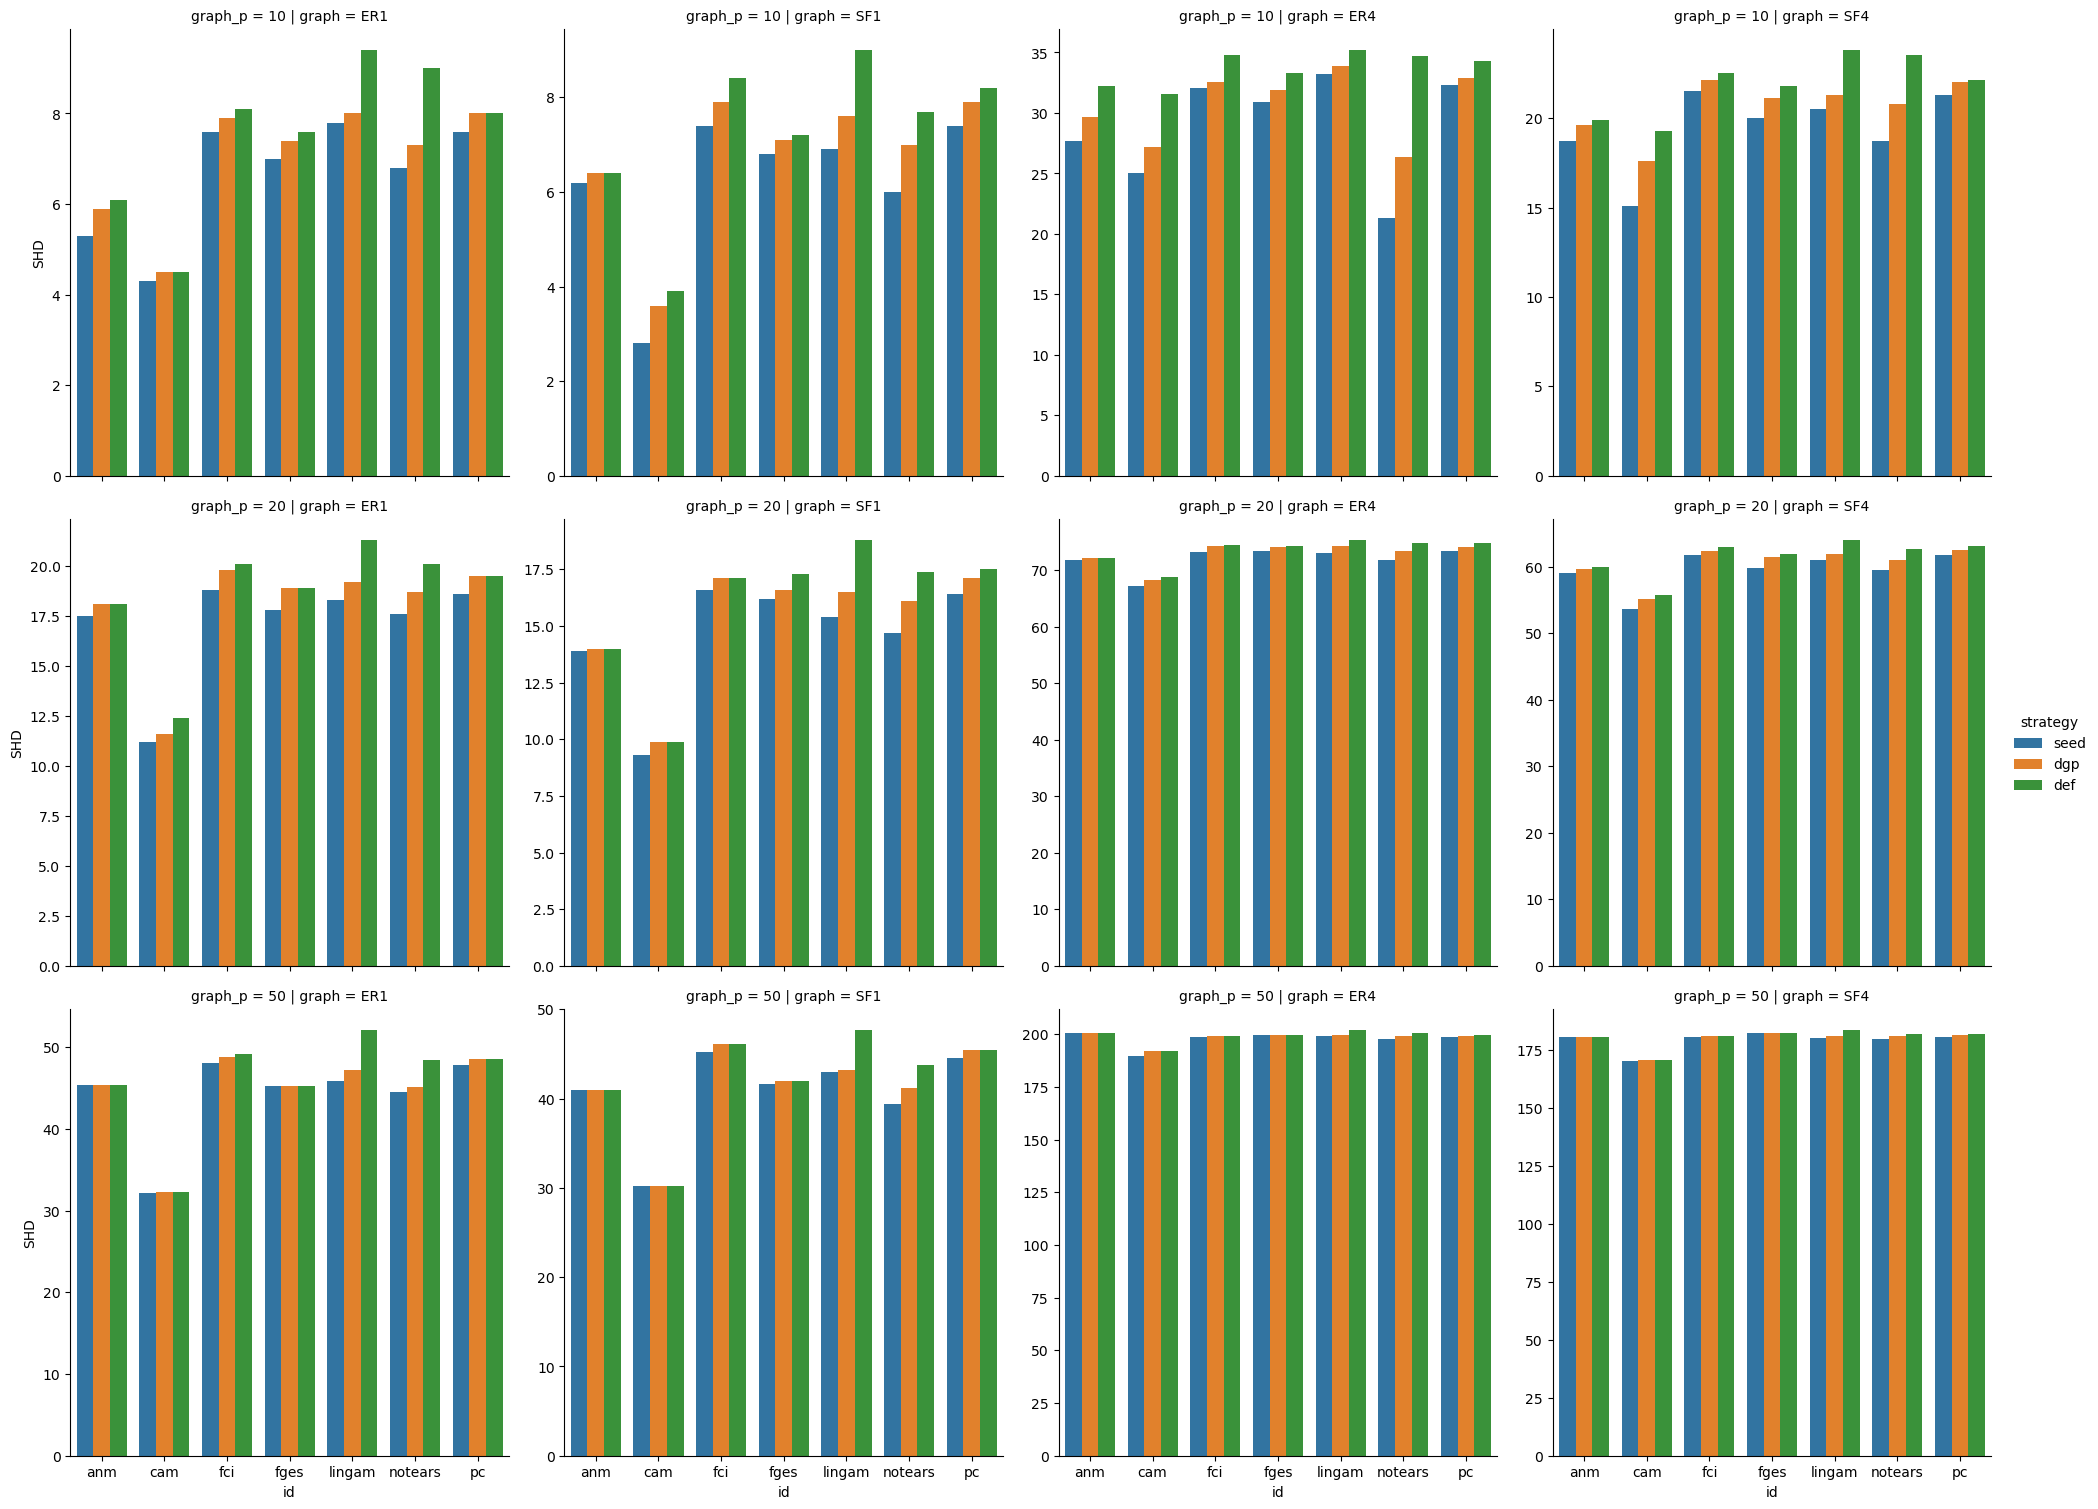

SEM = gp, n = 1000


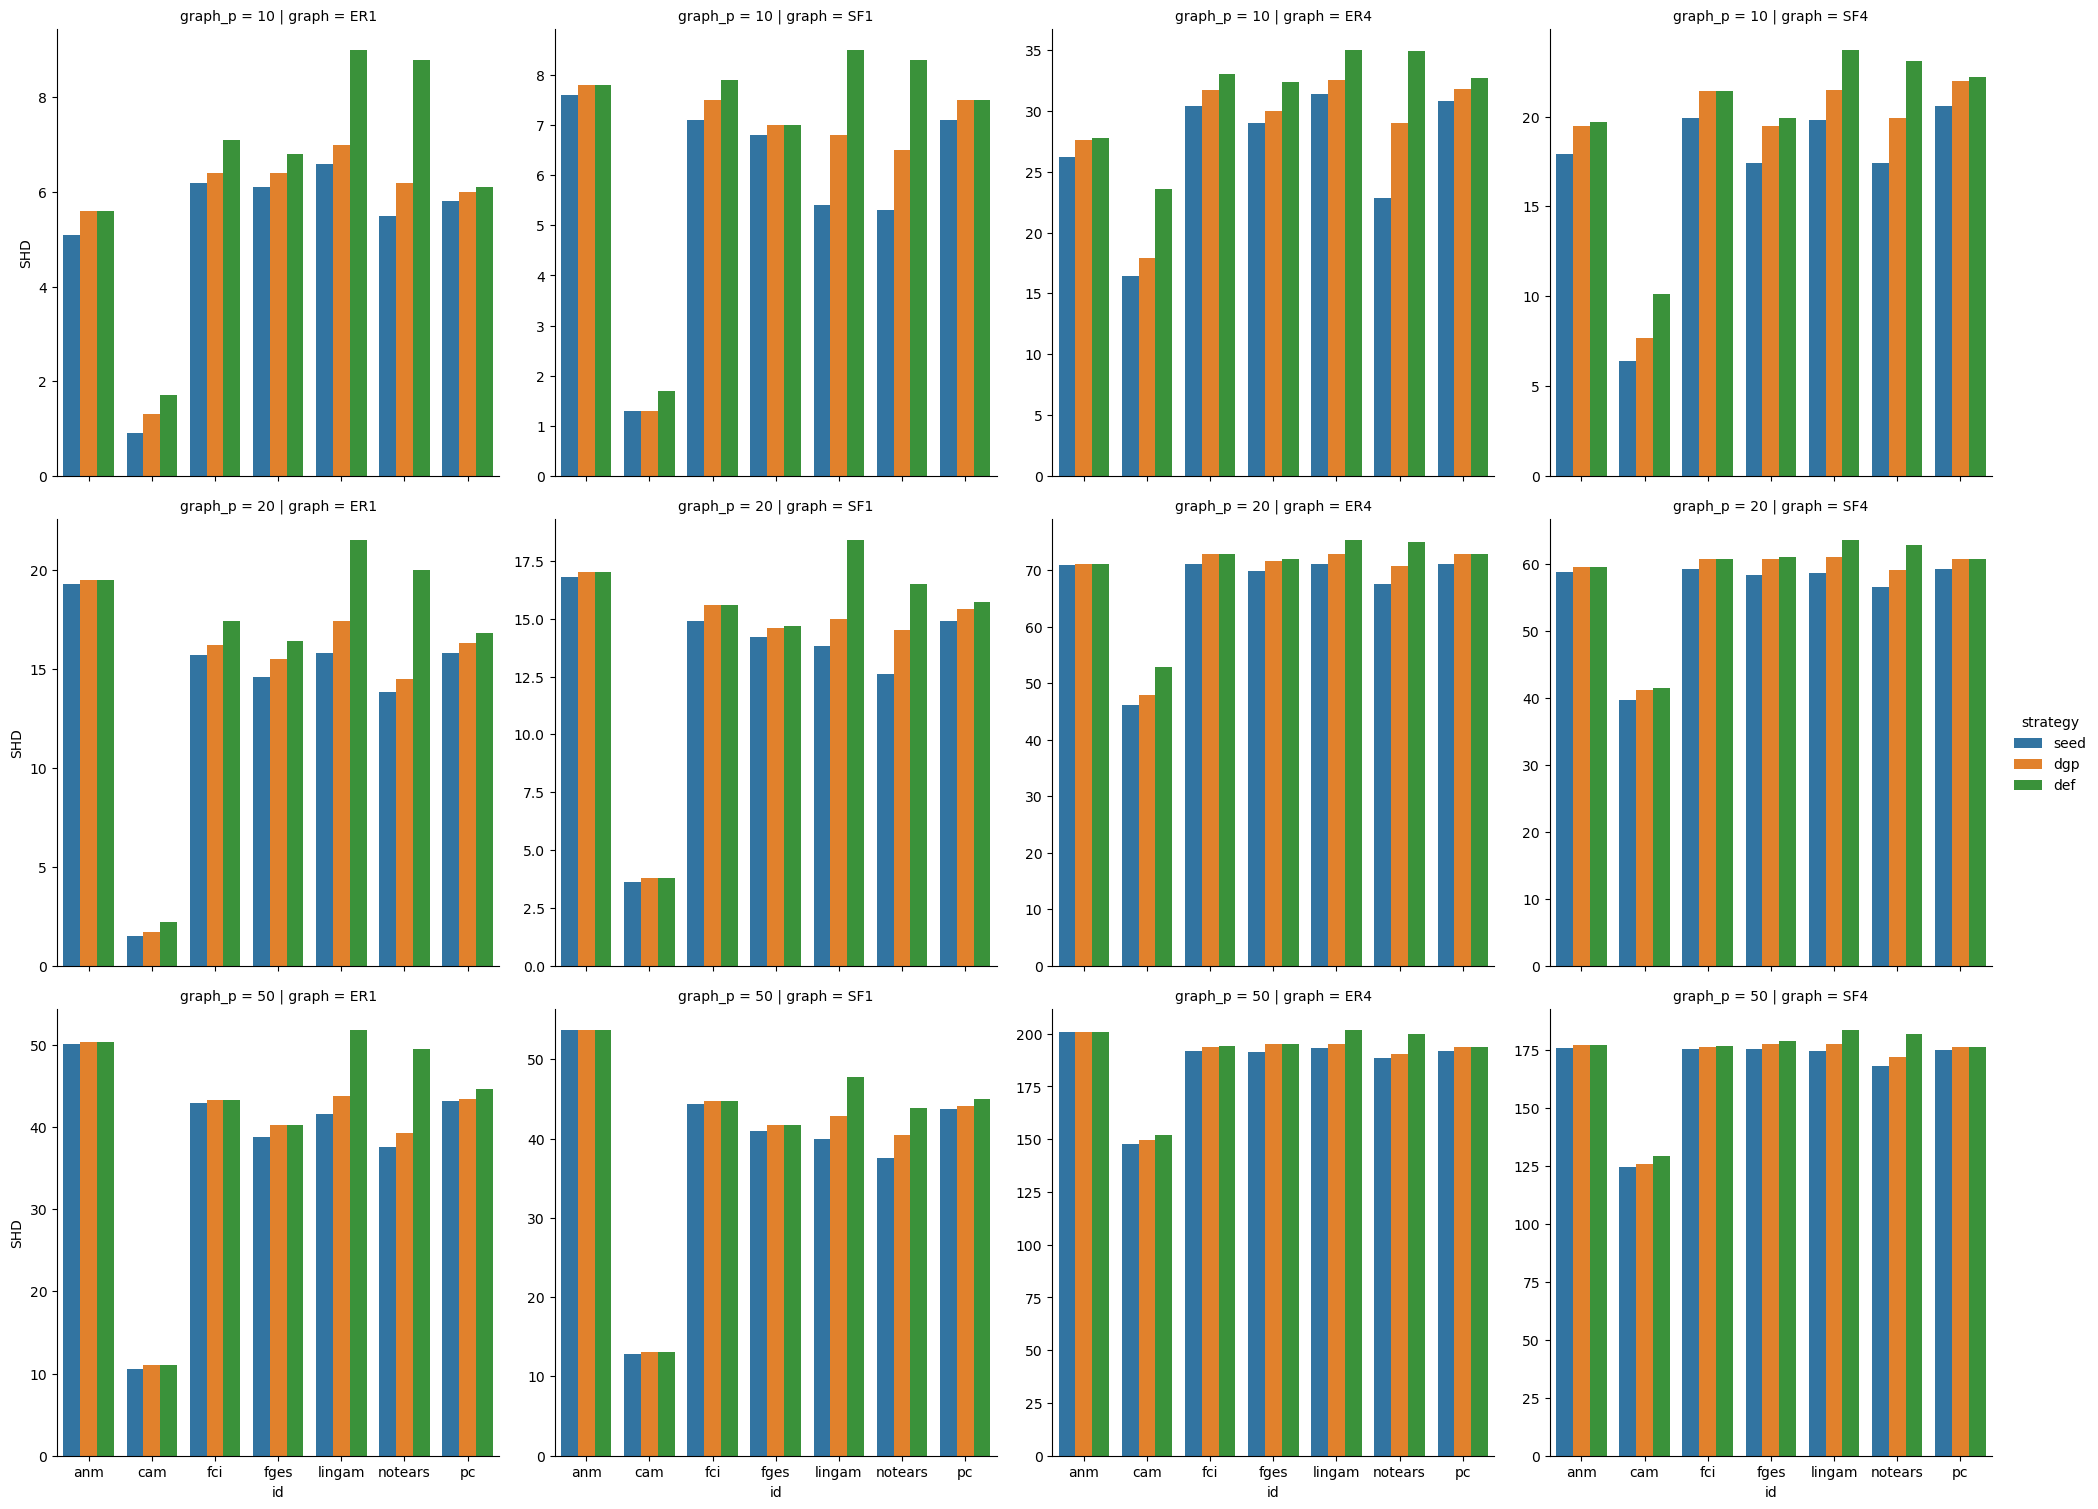

SEM = gumbel, n = 200


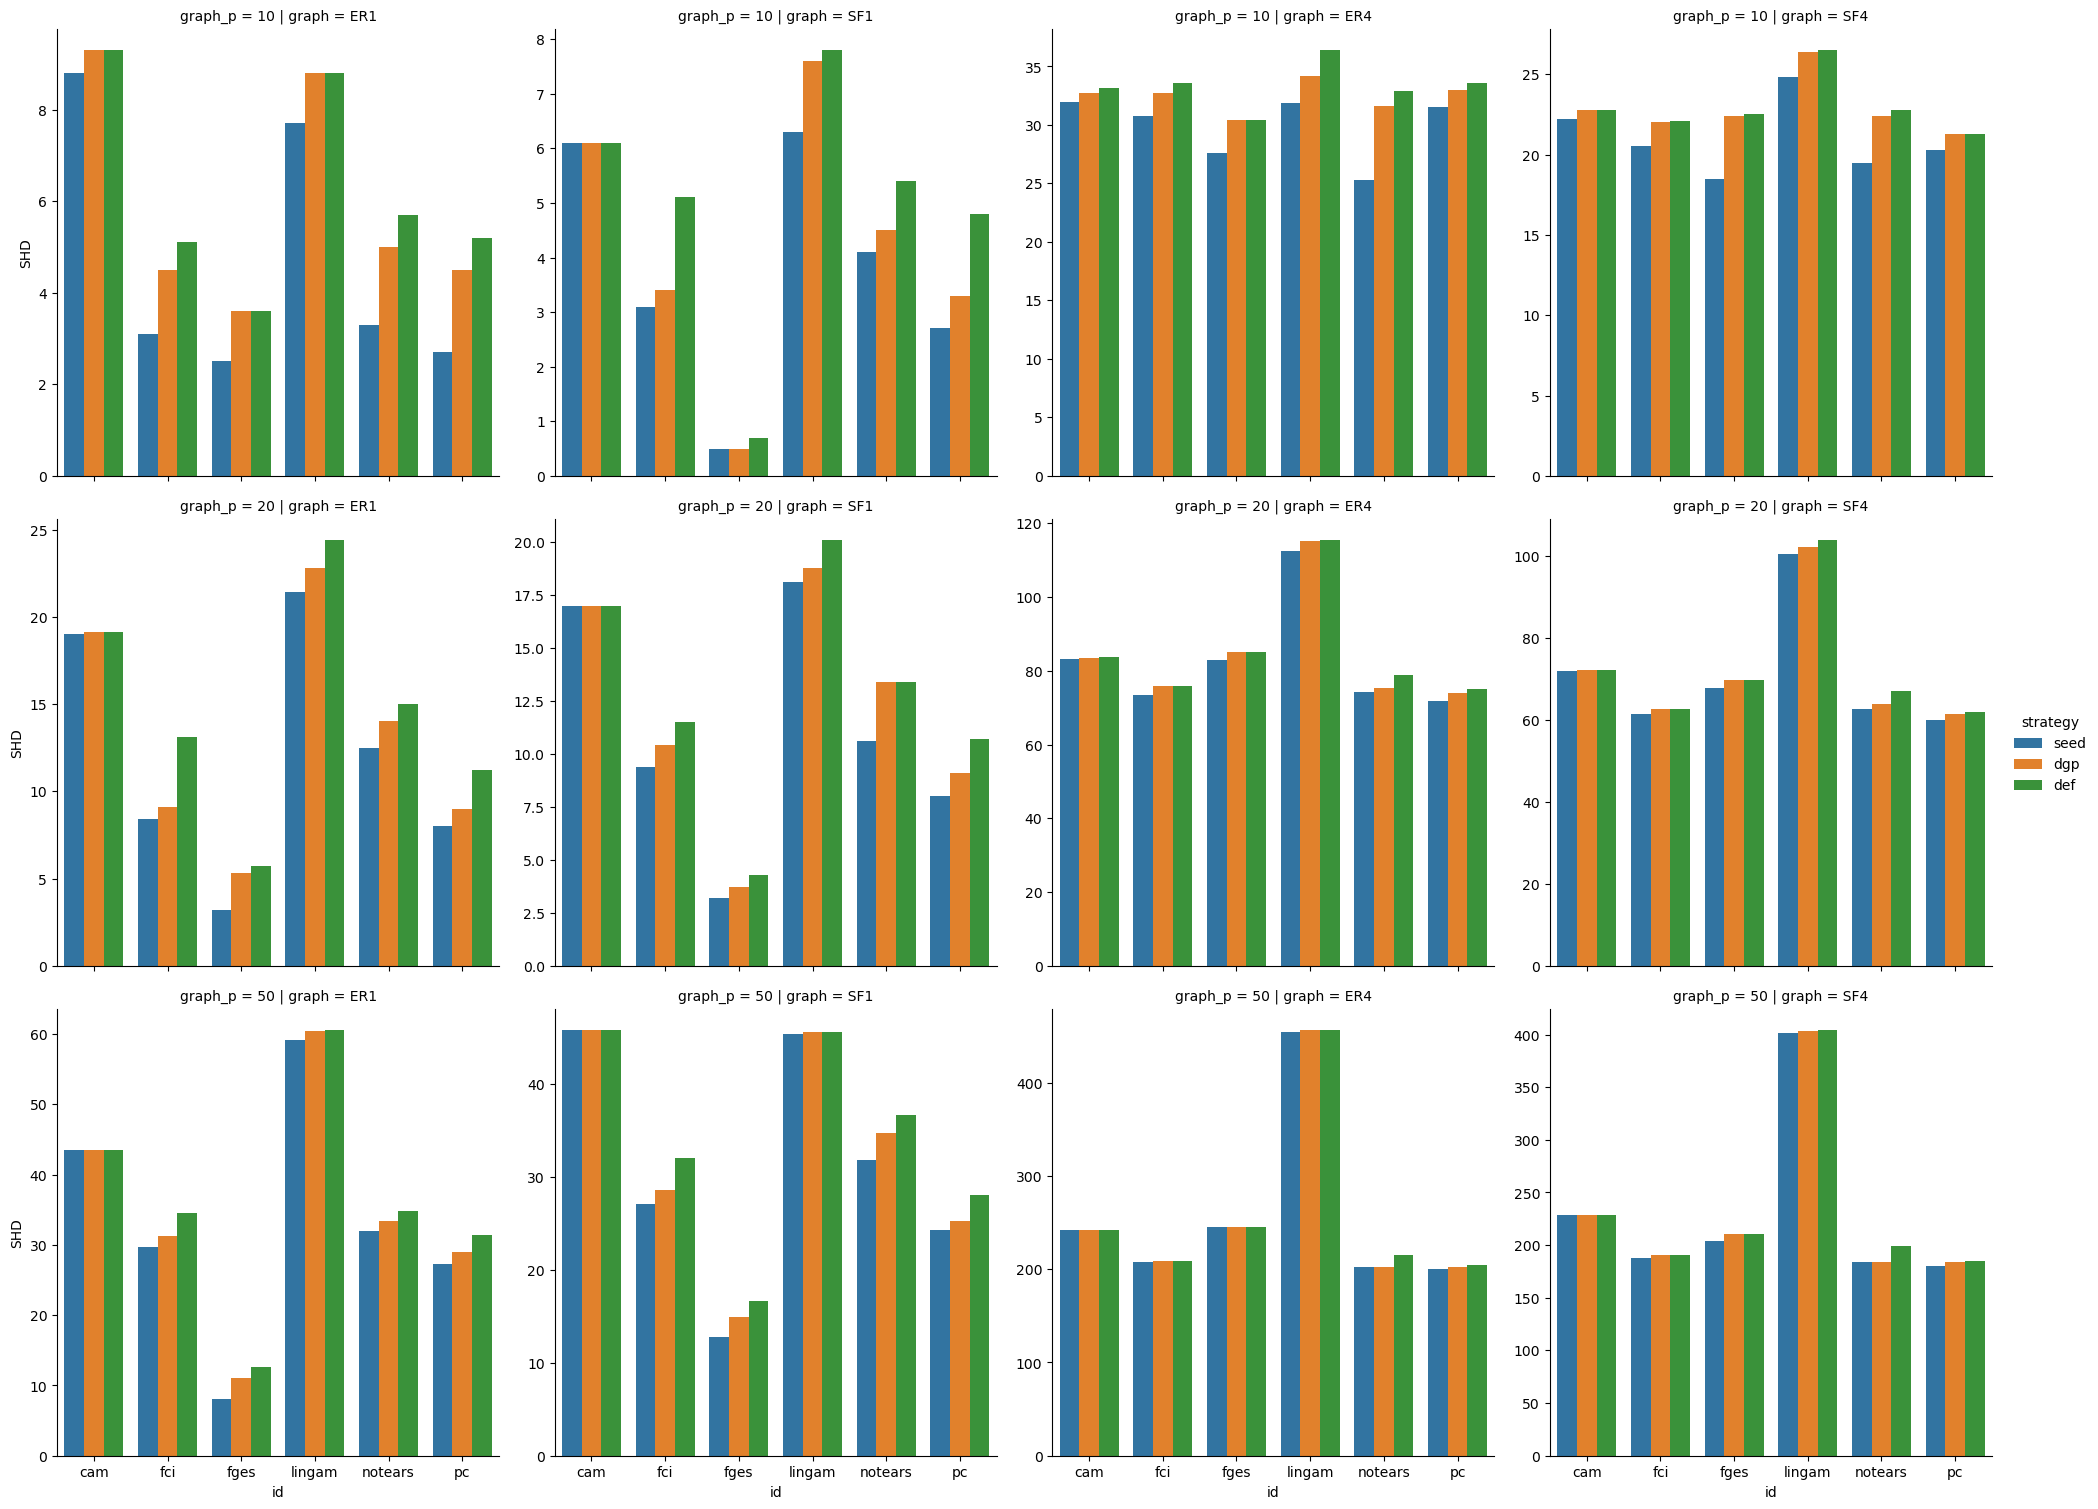

SEM = gumbel, n = 1000


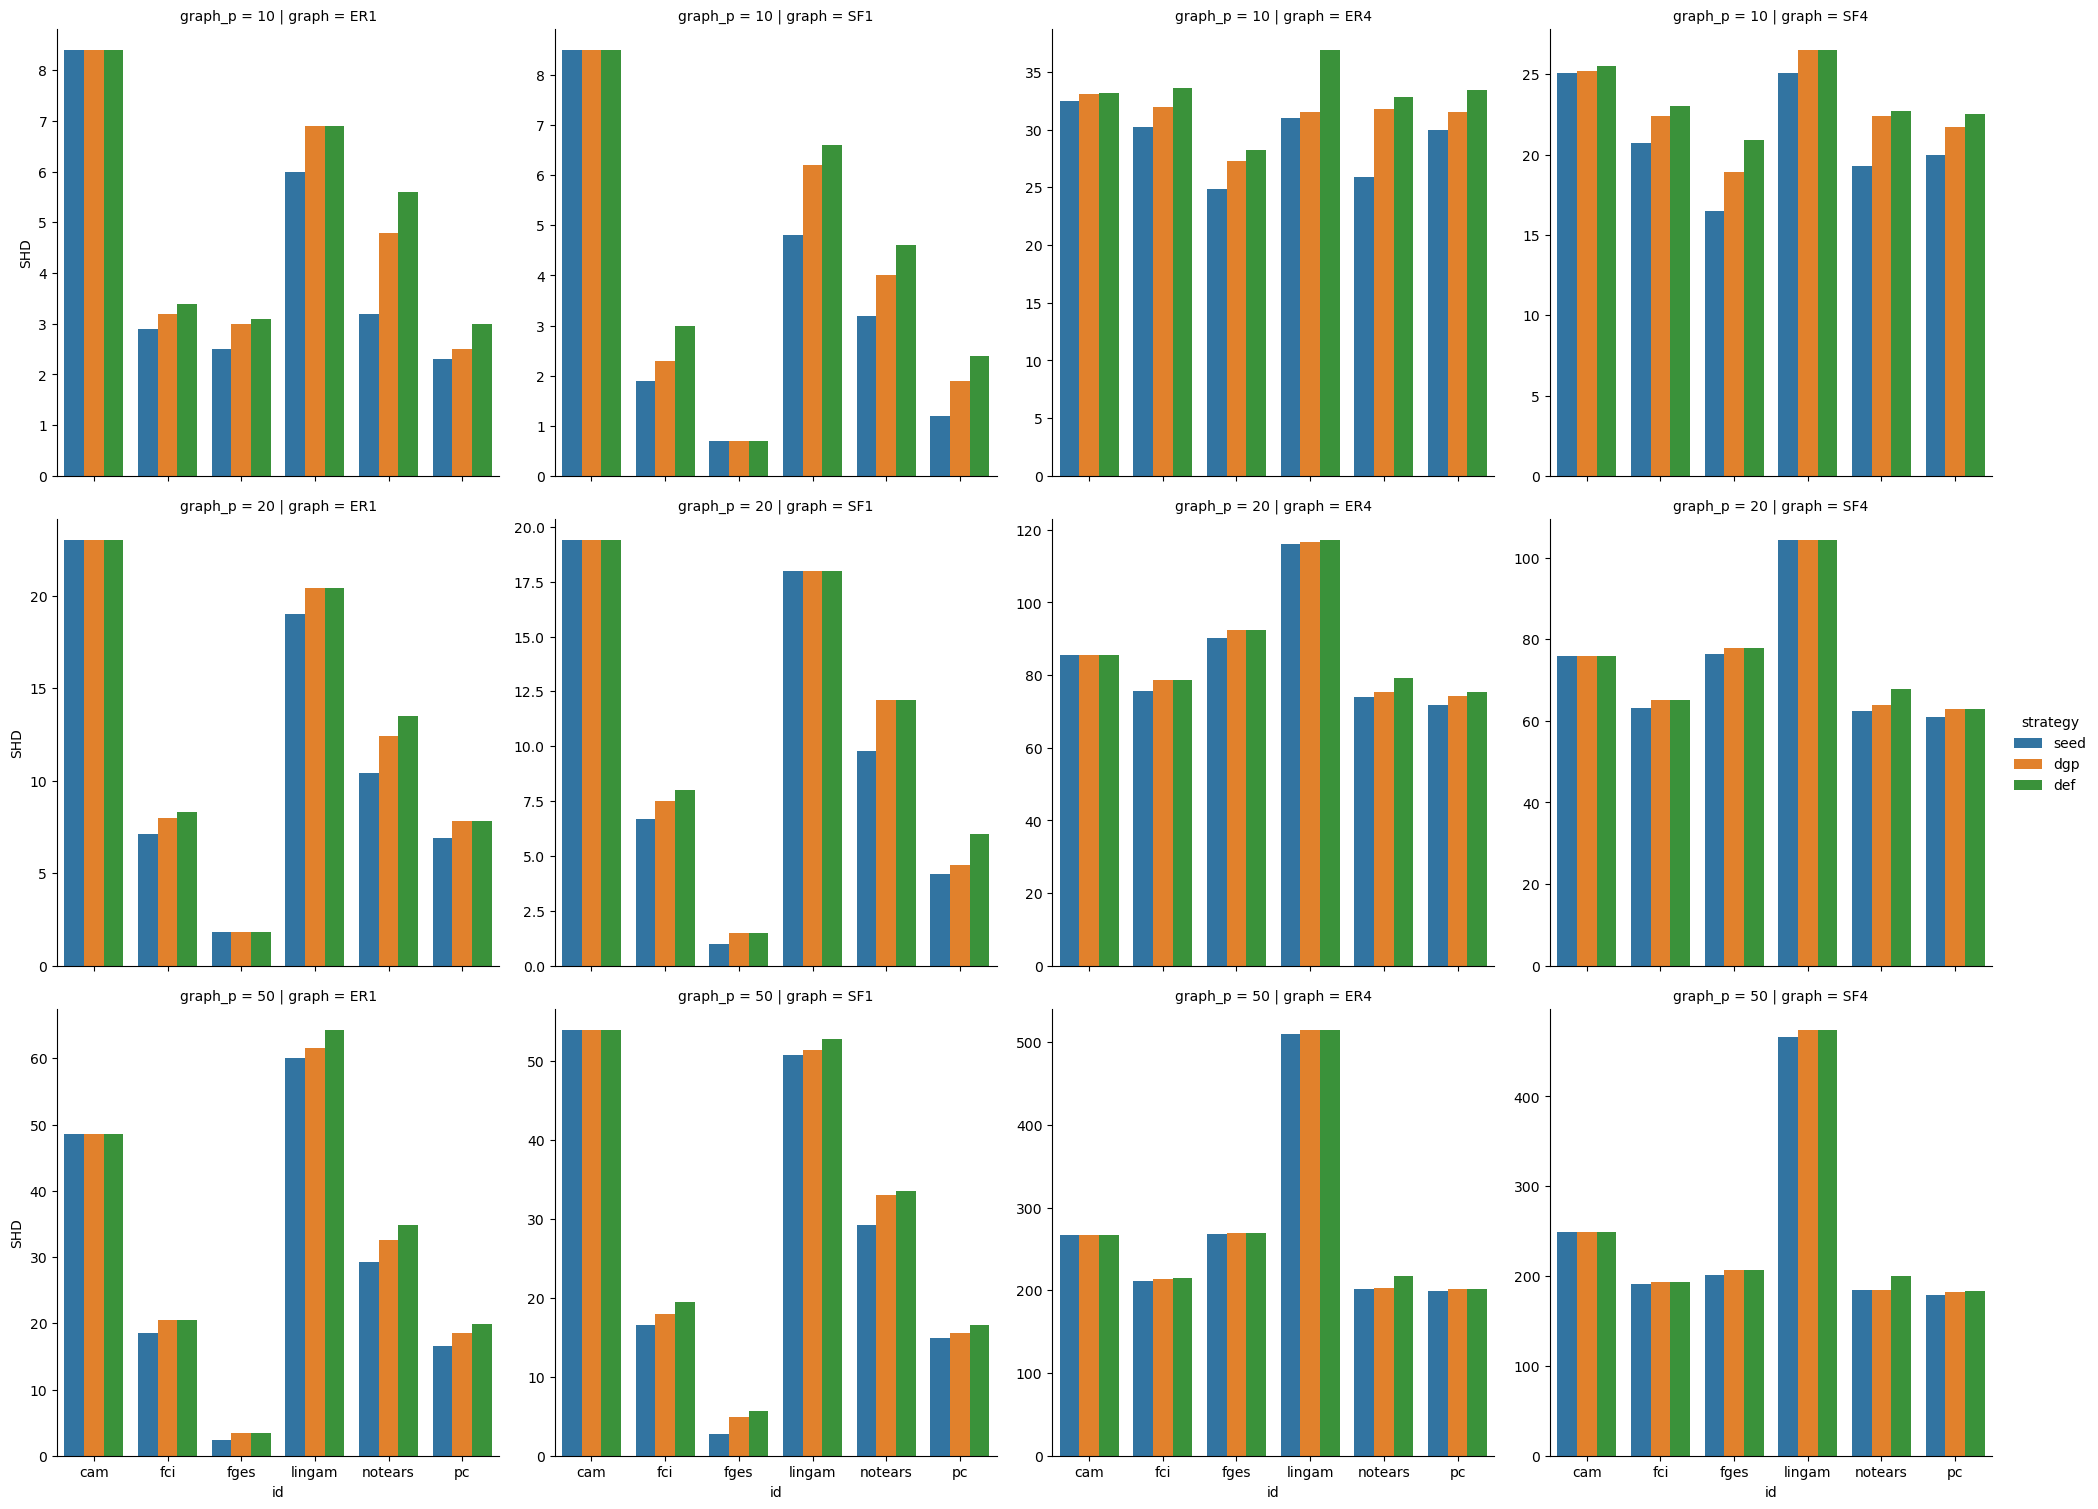

In [20]:
for sem in ['gp', 'gumbel']:
    for n in [200, 1000]:
        print(f'SEM = {sem}, n = {n}')
        df1 = select(df_final, sem, n)
        sns.catplot(data=df1, x='id', y='SHD', col='graph', row='graph_p', hue='strategy', kind='bar', ci=None, sharey=False)
        plt.show()

## Tables

In [12]:
merge_key = ['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n']
df_final = df_agg.merge(df_seeds, on=merge_key).merge(df_sems, on=merge_key).merge(df_all, on=merge_key)

# for tables, use means and sems.

In [14]:
df_final

,id,graph_p,graph_d,graph_type,data_sem,data_n,seed,SHD_sem_x,dgp,SHD_sem_y,sem,SHD_sem_x,def,SHD_sem_y,graph_type_d,id_up
0,anm,10,1,er,gp,200,5.3,0.789515,5.9,0.657436,6.1,0.721880,6.1,0.721880,ER1,ANM
1,anm,10,1,er,gp,1000,5.1,0.706321,5.6,0.845905,5.6,0.845905,5.6,0.845905,ER1,ANM
2,anm,10,1,er,gumbel,200,11.6,1.407914,11.8,1.372751,11.8,1.372751,11.8,1.372751,ER1,ANM
3,anm,10,1,er,gumbel,1000,11.8,1.781385,12.3,1.782944,12.3,1.782944,12.3,1.782944,ER1,ANM
4,anm,10,1,sf,gp,200,6.2,0.489898,6.4,0.520683,6.4,0.520683,6.4,0.520683,SF1,ANM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,pc,50,4,er,gumbel,1000,199.5,6.022642,201.9,6.275968,203.0,6.153590,201.9,6.275968,ER4,PC
332,pc,50,4,sf,gp,200,180.5,0.945751,181.4,0.871780,181.4,0.871780,181.9,0.924362,SF4,PC
333,pc,50,4,sf,gp,1000,175.1,2.316367,176.3,2.490203,176.8,2.337140,176.3,2.490203,SF4,PC
334,pc,50,4,sf,gumbel,200,180.4,1.557776,183.7,1.801543,183.7,1.801543,184.7,1.430229,SF4,PC


In [13]:
def select_case(df, n):
    return df.loc[(df['data_n'] == n)]

df_final['graph_type_d'] = df_final.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)
df_final['id_up'] = df_final.apply(lambda x: x['id'].upper(), axis=1)

In [ ]:
df_selected = select_case(df_final, 200)
sns.catplot(data=df_selected, x='graph_p', y='SHD_pattern', hue='id_up', col='graph_type_d', row='data_sem', errorbar='se', kind='bar', sharey=False)